# Hypothesis testing

We have two biased coins, referred to as coins 1 and 2, with probabilities of heads equal to $p_1$ and $p_2$, respectively. We choose a coin at random
(either coin is equally likely to be chosen) and we want to infer its identity, based
on the outcome of several tosses. Let $\Theta=1$ and $\Theta=2$ be the hypotheses that coin
1 or 2, respectively, was chosen. Let X be equal to 1 or 0, depending on whether
the outcome of the toss was a head or a tail, respectively. 

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
Multiprocess sampling (4 chains in 4 jobs)
BinaryGibbsMetropolis: [coin]
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.


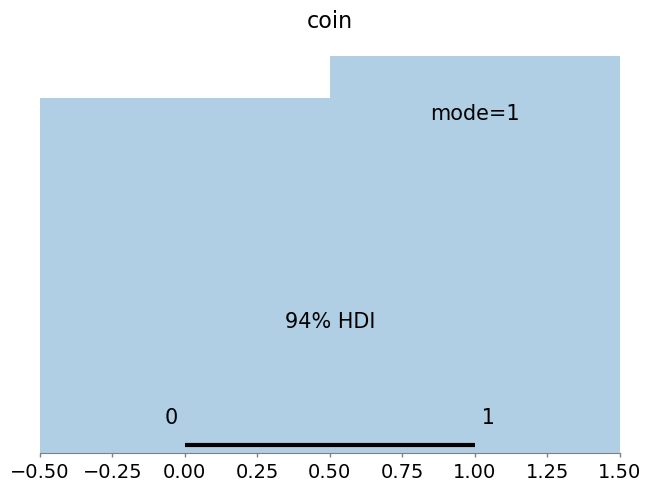

       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
coin  0.528  0.499     0.0      1.0      0.004    0.003   13212.0    4000.0   

      r_hat  
coin    1.0  


In [1]:
import pymc3 as pm
import theano
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# These are the initial probabilities
p_1 = 0.46
p_2 = 0.52

# This is the data
number_tosses = 1
heads = 1

with pm.Model():
    # Here we indicate that we have 2 coins, and the probability
    # of selecting each of the coins is 0.5. This is our prior.
    coin = pm.Categorical('coin', p=[0.5, 0.5])
    
    # This is just a way to tell that if we select the first coin,
    # the probability of getting heads is p_1 and if we select
    # the second coin, the probability of heads is p_2
    p = theano.shared(np.array([p_1, p_2]))[coin]
    
    # Here the likelihood is binomial, because we don't have the result
    # for each individual toss
    y = pm.Binomial('y', p=p, n=number_tosses, observed=[heads])
    
    trace = pm.sample(1000, progressbar=True, return_inferencedata=False)
    
    # The mode
    az.plot_posterior(trace, point_estimate='mode')

    plt.show()
    
    print(az.summary(trace))

This indicates, that, according to the data, the selected coin was the second one.

**NOTE:** For problems with only discrete random variables, don't use the find_MAP function, it will break.

If now we have 50 tosses, 30 of them being tail

Multiprocess sampling (4 chains in 4 jobs)
BinaryGibbsMetropolis: [coin]
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.


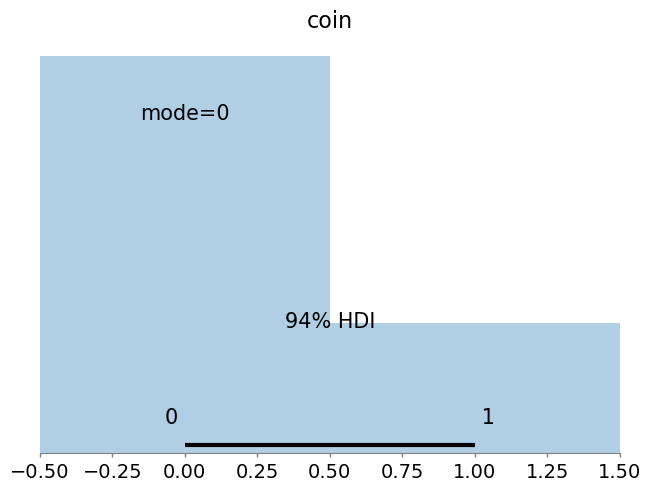

       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
coin  0.246  0.431     0.0      1.0      0.007    0.005    4285.0    4000.0   

      r_hat  
coin    1.0  


In [2]:
import pymc3 as pm
import theano
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# These are the initial probabilities
p_1 = 0.46
p_2 = 0.52

# This is the data
number_tosses = 50
heads = 20

with pm.Model():
    # Here we indicate that we have 2 coins, and the probability
    # of selecting each of the coins is 0.5
    coin = pm.Categorical('coin', p=[0.5, 0.5])
    
    # This is just a way to tell that if we select the first coin,
    # the probability of getting heads is p_1 and if we select
    # the second coin, the probability of heads is p_2
    p = theano.shared(np.array([p_1, p_2]))[coin]
    
    # Here the likelihood is binomial, because we don't have the result
    # for each individual toss
    y = pm.Binomial('y', p=p, n=number_tosses, observed=[heads])
    
    trace = pm.sample(1000, progressbar=True, return_inferencedata=False)
    
    # The mode
    az.plot_posterior(trace, point_estimate='mode')

    plt.show()
    
    print(az.summary(trace))

Compare this result with the theoretical one.

## Signal detection

We have 3 sources (labeled 0, 1 and 2) and one detector; when the detector is "paired" with one source it only reads the messages from that source. Let's assume that our detector is paired but we don't know what source is paired with. When the detector reads the message it sees some white noise that is modeled as a standard normal distribution.

$$X = \mu + N$$

In order to find out with what source the detector is paired, we send a different message (a number) from each source and we repeat that message 10 times. Then, we collect the message that the receptor received.

We know that the probability that the detector is paired with the source number 2 is twice  the probability that it is paired with source 0 or 1, and we also know that the probability that it is paired with source 0 is the same as the probability that it is paired with source 1.

Multiprocess sampling (4 chains in 4 jobs)
CategoricalGibbsMetropolis: [source]
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.


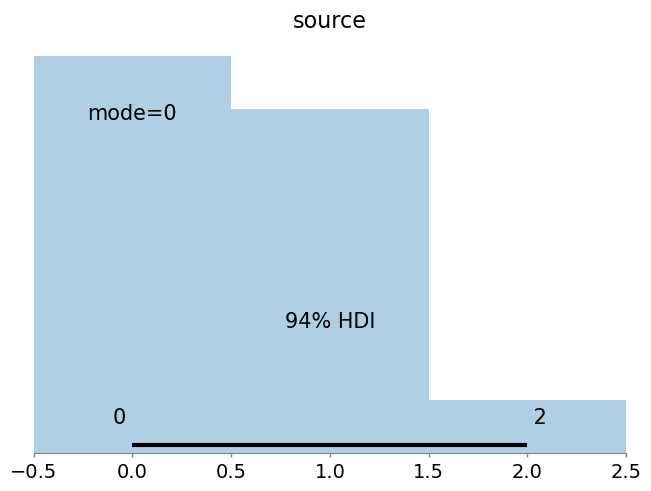

         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
source  0.566  0.615     0.0      2.0       0.01    0.007    4133.0    4000.0   

        r_hat  
source    1.0  


In [3]:
# These are the values of the messages
mu_0 = -0.3
mu_1 = 0.2
mu_2 = 0.7

data = [-1.26318642,  0.5758068 , -0.16657075,  0.08515534, -0.89754746,
    0.20262975,  0.19462712,  0.52539873, -0.34519777,  0.34857591]

with pm.Model() as signal_detection_model:
    # Here we indicate that we have 3 different sources, and the prior probabilities
    source = pm.Categorical('source', p=[0.25, 0.25, 0.5])

    # This is just a way to tell that if the data comes from source 0
    # the mean should be mu_0 and the same with the other sources
    mu = theano.shared(np.array([mu_0, mu_1, mu_2]))[source]

    # The likelihood is normal
    y = pm.Normal('y', mu=mu, sigma=1, observed=data)

    trace = pm.sample(1000, progressbar=True, return_inferencedata=False)

    # The mode is the MAP
    az.plot_posterior(trace, point_estimate='mode')

    plt.show()

    print(az.summary(trace))

The data and the model indicates that, contrary to our prior beliefs, the detector is most likely paired with source 0.

**Q:** What's the probability that the signal is from sources 0 or 1?

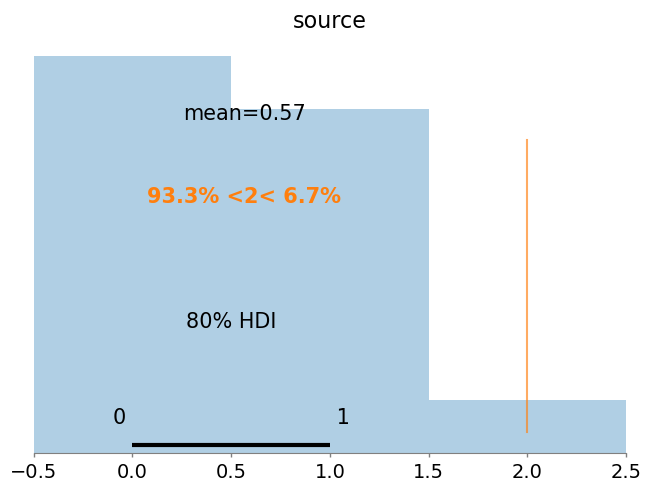

In [4]:
with signal_detection_model:
    az.plot_posterior(trace, hdi_prob=0.80, ref_val=2)
    plt.show()

**R:** The probability that the signal is from sources 0 or 1 if 93.2%.

## Groups comparison

One pretty common statistical analysis is group comparison. We may be interested in how
well patients respond to a certain drug, the reduction of car accidents by the introduction of
a new traffic regulation, student performance under different teaching approaches, and so
on.

Sometimes, this type of question is framed under the hypothesis testing scenario with the
goal of declaring a result statistically significant. Relying only on statistical significance can
be problematic for many reasons: on the one hand, statistical significance is not equivalent
to practical significance; on the other hand, a really small effect can be declared significant
just by collecting enough data. The idea of hypothesis testing is connected to the concept of
p-values. This is not a fundamental connection but a cultural one; people are used to
thinking that way mostly because that's what they learn in most introductory statistical
courses. There is a long record of studies and essays showing that, more often than not, p-
values are used and interpreted the wrong way, even by people who are using them on a
daily basis.

Instead of doing hypothesis testing, we are going to take a different route and we are going
to focus on estimating the **effect size**, that is, quantifying the difference between two
groups. One advantage of thinking in terms of effect size is that we move away from the
yes-no questions like; Does it work?, Is there any effect? to the more nuance type of
question like; How well does it work? How large/small is the effect?

Sometimes, when comparing groups, people talk about a control group and a treatment
group (or maybe more than one control and treatment groups). This makes sense, for
example, when we want to test a new drug: because of the placebo effect and other reasons,
we want to compare the new drug (the treatment) against a control group (a group not
receiving the drug). In this case, we want to know how well one drug works compared to
doing nothing (or, as is generally done, against the placebo effect). One interesting
alternative question will be to ask how good a new drug is compared with the (already
approved) most popular drug to treat that illness. In such a case, the control group cannot
be a placebo; it should be the other drug. Bogus control groups are a splendid way to lie
using statistics.

For example, imagine you work for a dairy product company that wants to sell overly
sugared yogurts to kids by telling their dads and moms that this particular yogurt boosts
the immune system or help their kids grow stronger. One way to cheat and falsely back up
your claims with data is by using milk or even water as a control group, instead of another
cheaper, less sugary, less marketed yogurt. It may sound silly when I put this way, but
there is a lot of actual research done this way. In fact, I am describing actual papers, not
imaginary hypothetical scenarios. When someone says something is harder, better, faster,
stronger, remember to ask what the baseline used for the comparison was.

To compare groups, we must decide which feature (or features) we are going to use for the
comparison. A very common feature is the mean of each group. Because we are Bayesian,
we will work to obtain a posterior distribution of the differences of means between groups
and not just a point-estimate of the differences. To help us see and interpret such a
posterior, we are going to use three tools:

* A posterior plot with a reference value
* The Cohen's d
* The probability of superiority

### Cohen's d

A common way to measure the effect size is Cohen's d, which is defined as follows:

$$\frac{{{\mu _2} - {\mu _1}}}{{\sqrt {\frac{{{\sigma _1}^2 + {\sigma _2}^2}}{2}} }}.$$

According to this expression, the effect size is the difference of the means with respect to
the pooled standard deviation of both groups. Because we can get a posterior distribution
of means and standard deviations, we can compute a posterior distribution of Cohen's d
values. Of course, if we just need or want one single value, we can compute the mean of
that posterior distribution and get a single Cohen's d value. Generally, when computing a
pooled standard deviation, we take into account the sample size of each group explicitly,
but the previous formula is omitting the sample size of both groups. The reason for this is
that we are getting the values of the standard deviation from the posterior and thus we are
already accounting for the standard deviations' uncertainty.

Cohen's d introduces the variability of each group by using their standard deviations. This
is really important, as differences of one when you have a standard deviation of 0.1 seems
large compared to the same difference when the standard deviation is 10. Also, a change of $x$
units from one group to another could be explained by every individual data point
changing exactly $x$ units or by half of them not changing and the other half changing
units $2x$, and by many other combinations. Thus, including the intrinsic variations of groups is
a way to put the differences in context. Re-scaling (standardizing) the differences helps us
make sense of the importance of the different between groups, even when we are not very
familiar with the scale used for the measurements.

A Cohen's d can be interpreted as a Z-score (a standard score). A Z-
score is the signed number of standard deviations by which a value differs
from the mean value of what is being observed or measured. Thus, a
Cohen's d of 0.5 could be interpreted as a difference of 0.5 standard
deviation of one group with respect to the other.

Even when the differences of means are standardized, we may still need to calibrate
ourselves based on the context of a given problem to be able to say if a given value is big,
small, medium, and so on. Fortunately, this calibration can be acquired with enough practice.
Just as an example, if we are used to performing several analyses for more or less the same
type of problems, we can get used to a Cohen's d of say 1, so when we get a Cohen's d of
say 2, we know we have something important (or someone made a mistake somewhere!). If
you do not have this practice yet, you can ask a domain expert for their valuable input. A
very nice web page to explore what different values of Cohen's d look like is
http://rpsychologist.com/d3/cohend. On that page, you will also find other ways to
express an effect size; some of them could be more intuitive, such as the probability of
superiority, which we will discuss next.

### Probability of superiority

This is another way to report the effect size, and this is defined as the probability that a data
point taken at random from one group has a larger value than one also taken at random
from the other group. If we assume that the data we are using is distributed as a normal, we
can compute the probability of superiority from the Cohen's d using the following
expression:

$${p_s} = \Phi \left( {\frac{\delta }{{\sqrt 2 }}} \right)$$

Here $\Phi$, is the cumulative normal distribution and $\delta$ is the Cohen's d. We can compute a
point-estimate of the probability of superiority (what is usually reported), or we can
compute the whole posterior distribution of values. If we are OK with the normality
assumption, we can use this formula to get the probability of superiority from the Cohen's
d. Otherwise, as we have samples from the posterior, we can directly compute it. This is a very nice advantage of using Markov chain Monte Carlo
(MCMC) methods; once we get samples from the posterior, we can compute many
quantities from it.

## An example

To explore the subject matter of this section, we are going to use the tips dataset. This data
was reported for the first time by Bryant, P. G. and Smith, M (1995) in Practical Data
Analysis: Case Studies in Business Statistics. You can download the data file from here https://parisnanterrefr.sharepoint.com/:x:/s/IES-D3SStatBayessienne/EeAI2xB-cJ9BmXGKE8M4pxQBjplZcTa3Dn5y87SRvl7IAQ?e=JfZDqy

We want to study the effect of the day of the week on the amount of tips at a restaurant. For
this example, the different groups are the days. Notice there is no control group or
treatment group. If we wish, we can arbitrarily establish one day, for example, Thursday, as
the reference or control. For now, let's start the analysis by loading the dataset as a pandas
DataFrame using just one line of code. If you are not familiar with pandas, the tail
command is used to show the last rows of a DataFrame (you can also try using head):

In [5]:
import pandas as pd
tips = pd.read_csv('tips.csv')
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


For this problem we assume that the amount of tips received on a given day is a normal random variable.

Just to simplify things, we are going to create three variables: the `tip` variable, representing
the tips, the `idx` variable, a categorical dummy variable to encode the days with numbers,
that is, [0, 1, 2, 3] instead of [Thursday, Friday, Saturday, Sunday], and finally
the `groups` variable, with the number of groups (4):

In [6]:
tip = tips['tip'].values
idx = pd.Categorical(tips['day'], categories=['Thur', 'Fri', 'Sat', 'Sun']).codes
groups = len(np.unique(idx))
print(idx)
print(tip)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1
 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0]
[ 1.01  1.66  3.5   3.31  3.61  4.71  2.    3.12  1.96  3.23  1.71  5.
  1.57  3.    3.02  3.92  1.67  3.71  3.5   3.35  4.08  2.75  2.23  7.58
  3.18  2.34  2.    2.    4.3   3.    1.45  2.5   3.    2.45  3.27  3.6
  2.    3.07  2.31  5.    2.24  2.54  3.06  1.32  5.6   3.    5.    6.
  2.05  3.    2.5   2.6   5.2   1.56  4.34  3.51  3.    1.5   1.76  6.73
  3.21  2.    1.98  3.76  2.64  3.15  2.47  1.    2.01  2.09  1.97  3.
  3.14  5.    2.2   1.25  3.08  4.    3.    2.71  3.    3.4   1.83  5.
  

The model for this problem is almost the same as the normal model we saw last class; the only difference is that now $\mu$
and $\sigma$ are going to be vectors instead of scalar variables. PyMC3 syntax is extremely
helpful for this situation: instead of writing `for loops`, we can write our model in a
vectorized way. This means that for the priors, we pass a shape argument and for the
likelihood, we properly index the means and sds variables using the idx variable:

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


/Users/carlos/miniconda3/envs/bayesianStats/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/carlos/miniconda3/envs/bayesianStats/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/carlos/miniconda3/envs/bayesianStats/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/carlos/miniconda3/envs/bayesianStats/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 9 seconds.


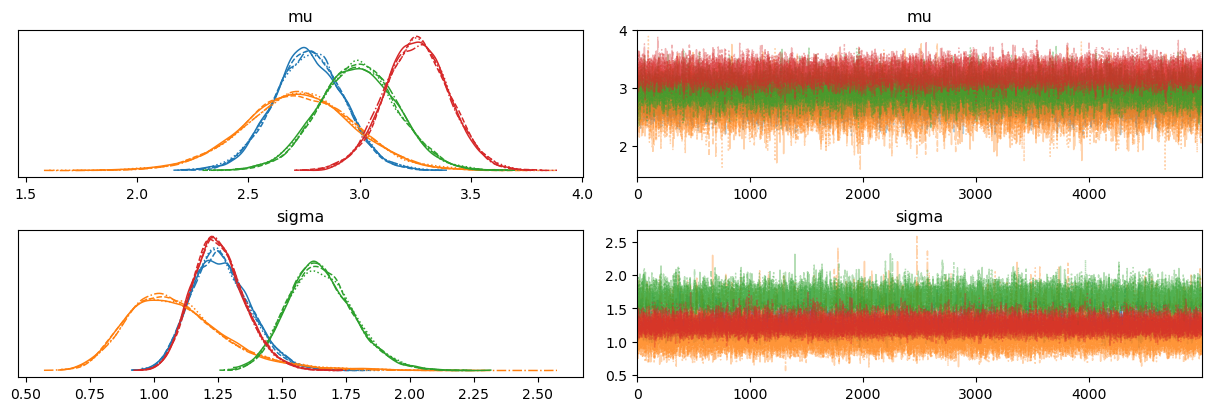

In [7]:
with pm.Model() as comparing_groups:
    # mu and sigma are vectors because we are passing the parameter shape.
    # With this, we are telling PyMC3 that we want to analyze 4 different mu's
    # and 4 different sigma's
    mu = pm.Normal('mu', mu=0, sd=10, shape=groups)
    sigma = pm.HalfNormal('sigma', sd=10, shape=groups)
    
    # We use the variable idx to index the mean and the standard deviation
    y = pm.Normal('y', mu=mu[idx], sd=sigma[idx], observed=tip)
    trace_cg = pm.sample(5000, return_inferencedata=False)
    az.plot_trace(trace_cg)

The following code is just a way of plotting the difference without repeating the
comparison. Instead of plotting the all-against-all matrix, we are just plotting the upper
triangular portion:

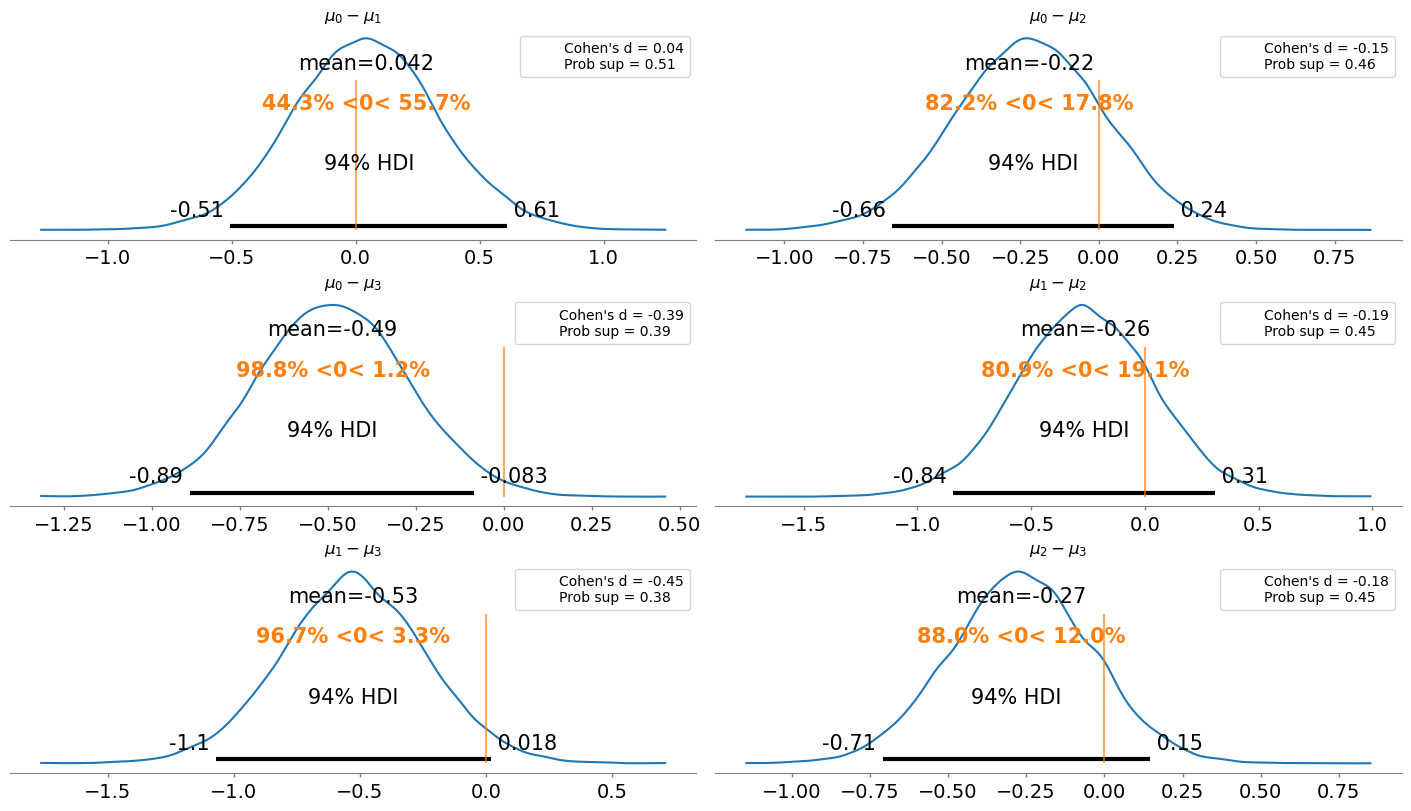

In [9]:
from scipy import stats

dist = stats.norm()

# This is just preparations for the plots
_, ax = plt.subplots(3, 2, figsize=(14, 8), constrained_layout=True)
comparisons = [(i, j) for i in range(4) for j in range(i+1, 4)]
pos = [(k, l) for k in range(3) for l in (0, 1)]


for (i, j), (k, l) in zip(comparisons, pos):
    # Calculate the difference between the means
    means_diff = trace_cg['mu'][:, i] - trace_cg['mu'][:, j]
    # Obtain Cohen's d
    d_cohen = (means_diff / np.sqrt((trace_cg['sigma'][:, i]**2 +trace_cg['sigma'][:, j]**2) / 2)).mean()
    # Obtain the probability of superiority
    ps = dist.cdf(d_cohen/(2**0.5))
    # Plot the posterior distribution of the difference between the means
    az.plot_posterior(means_diff, ref_val=0, ax=ax[k, l])
    
    # Draw the legend
    ax[k, l].set_title(f'$\mu_{i}-\mu_{j}$')
    ax[k, l].plot(0, label=f"Cohen's d = {d_cohen:.2f}\nProb sup = {ps:.2f}",alpha=0)
    ax[k, l].legend()

One way to interpret these results is by comparing the reference value with the HPD
interval. According to the previous diagram, we have only one case when the 94% HPD
excludes the reference value of zero, that is, the difference in tips between Thursday and
Sunday ($\mu_0-\mu_3$). For all the other examples, we cannot rule out a difference of zero (according to the
HPD-reference-value-overlap criteria). However, the plots suggest that tips on Sundays are a little bit better.
But even for that case, is an average difference of
≈0.5 dollars large enough? Is that difference enough to accept working on Sunday and
missing the opportunity to spend time with family or friends? Is that difference enough to
justify averaging the tips over the four days and giving every waitress and waiter the same
amount of tip money? Those kinds of questions cannot be answered by statistics; they can
only be informed by statistics.